Функция генерации определенного количества СВ (для каждого закона)
1) Биномиальное распределение
2) Распределение Бернулли
3) Геометрическое распределение
4) Распределение Пуассона
5) Экспоненциальное распределение
6) Равномерное распределение
7) Нормальное распределение
8) Распределение хи-квадрат
9) Распределение Стьюдента
10) Распределение Фишера
11) Распределение Вейбулла

3 выборки:
до 10
до 20
до 40
до 100
и больше 100 на свой выбор

для выборок посчитать оценки
мат ожиадание
ско в двух видах (смещенная и несмещенная)
медиана

Вторая часть (на следующую пару)
добавить шум (по этому же закону и по другому)
посчитать корреляцию и ковариацию для исходного и зашумленного ряда 

Ход работы:
1) Биномиальное распределение

M(X) =  50.59
Standart deviation =  4.9981896722713515
Median =  50.5


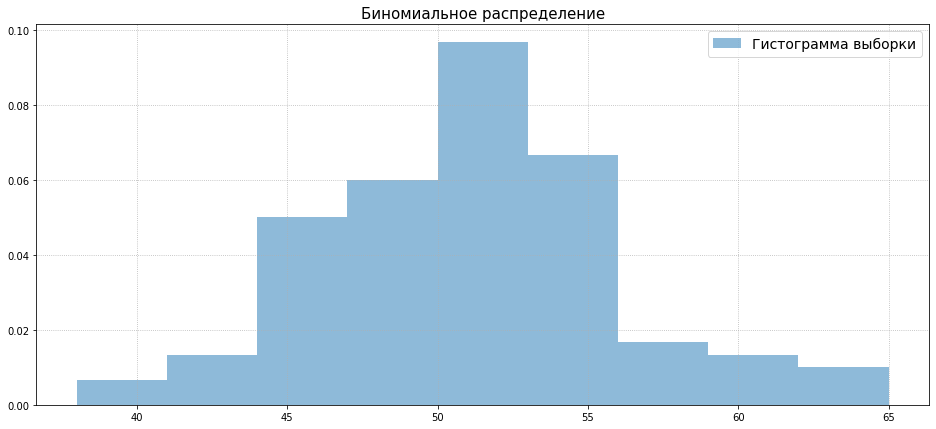

In [2]:
import scipy.stats as spystats
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

n, p, s = 100, 0.5, 100
binom_data = spystats.binom(n, p).rvs(size = s)
print("M(X) = ", binom_data.mean())
print("Standart deviation = ", binom_data.std())
print("Median = ", np.median(binom_data))

#median = np.median(binom_data)

#grid = np.linspace(-median - 5, median + 5, s)
plt.figure(figsize=(16, 7))
plt.hist(binom_data, bins="auto", density=True,
        alpha=0.5, label="Гистограмма выборки")
#plt.plot(grid, spystats.binom(n, p).pmf(grid), color="red",
#        lw=5, label="Плотность случайной величины")
plt.title("Биномиальное распределение", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

2) Распределение Бернулли

M(X) =  0.51
Standart deviation =  0.4998999899979995
Median =  1.0


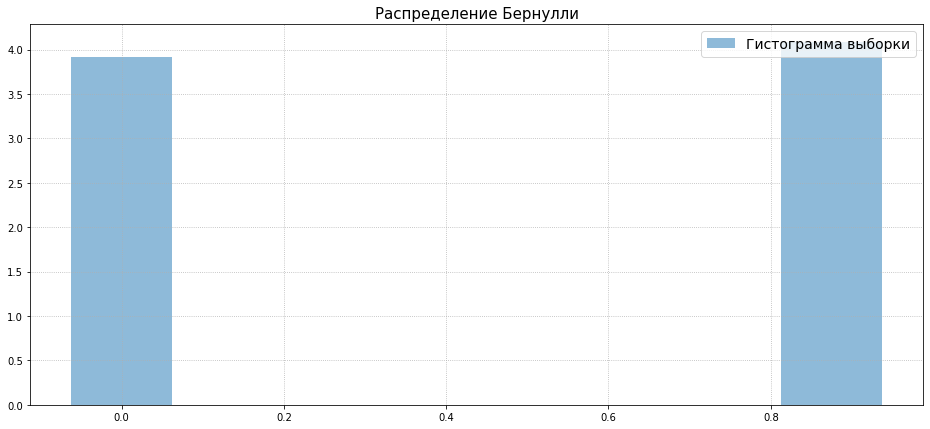

In [3]:
p, s = 0.5, 100
bern_data = spystats.bernoulli(p).rvs(size = s)
print("M(X) = ", bern_data.mean())
print("Standart deviation = ", bern_data.std())
print("Median = ", np.median(bern_data))

#median = np.median(bern_data)

#grid = np.linspace(-median - 5, median + 5, s)
plt.figure(figsize=(16, 7))
plt.hist(bern_data, bins="auto", density=True, align='left',
        alpha=0.5, label="Гистограмма выборки")
#plt.plot(grid, spystats.bernoulli(p).pmf(grid), color="red",
#        lw=5, label="Плотность случайной величины")
plt.title("Распределение Бернулли", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

3) Геометрическое распределение

M(X) =  1.96
Standart deviation =  1.5094369811290567
Median =  1.5


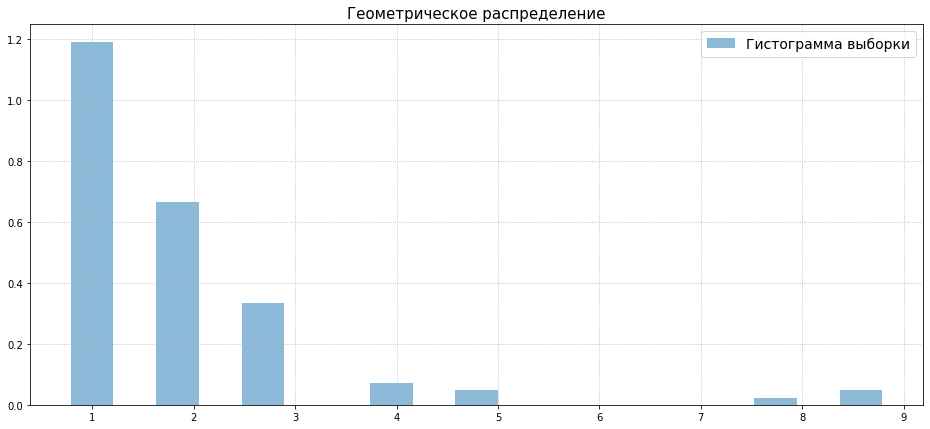

In [4]:
p, s = 0.5, 100
geom_data = spystats.geom(p).rvs(size = s)
print("M(X) = ", geom_data.mean())
print("Standart deviation = ", geom_data.std())
print("Median = ", np.median(geom_data))

#median = np.median(bern_data)

#grid = np.linspace(-median - 5, median + 5, s)
plt.figure(figsize=(16, 7))
plt.hist(geom_data, bins="auto", density=True, align='left',
        alpha=0.5, label="Гистограмма выборки")
#plt.plot(grid, spystats.geom(p).pmf(grid), color="red",
#        lw=5, label="Плотность случайной величины")
plt.title("Геометрическое распределение", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

4) Распределение Пуассона

M(X) =  1.69
Standart deviation =  1.3243488966280752
Median =  1.0


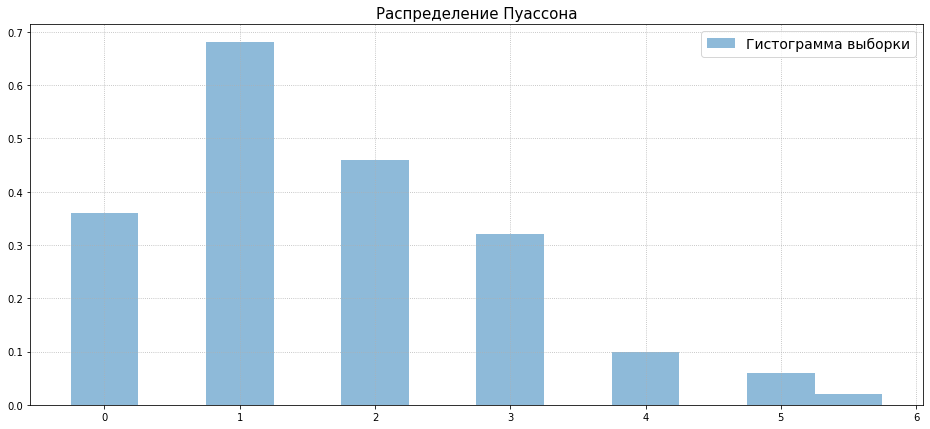

In [5]:
mu, s = 2, 100
poisson_data = spystats.poisson(mu).rvs(size = s)
print("M(X) = ", poisson_data.mean())
print("Standart deviation = ", poisson_data.std())
print("Median = ", np.median(poisson_data))

#median = np.median(bern_data)

#grid = np.linspace(-median - 5, median + 5, s)
plt.figure(figsize=(16, 7))
plt.hist(poisson_data, bins="auto", density=True, align='left',
        alpha=0.5, label="Гистограмма выборки")
#plt.plot(grid, spystats.poisson(mu).pmf(grid), color="red",
#        lw=5, label="Плотность случайной величины")
plt.title("Распределение Пуассона", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

5) Экспоненциальное распределение

M(X) =  0.8640424189704504
Standart deviation =  0.8538621227740546
Median =  0.5906849701296679


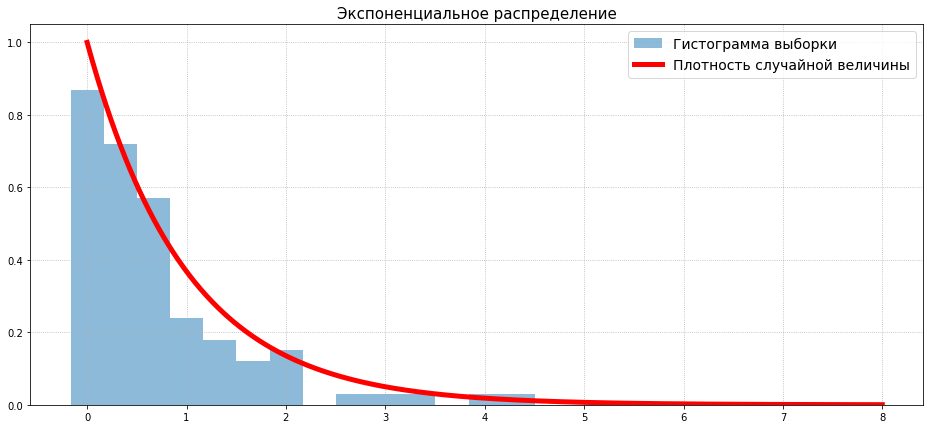

In [6]:
s = 100
expon_data = spystats.expon.rvs(size = s)
print("M(X) = ", expon_data.mean())
print("Standart deviation = ", expon_data.std())
print("Median = ", np.median(expon_data))

grid = np.linspace(0, 8, 1000)
plt.figure(figsize=(16, 7))
plt.hist(expon_data, bins="auto", density=True, align='left',
        alpha=0.5, label="Гистограмма выборки")
plt.plot(grid, spystats.expon.pdf(grid), color="red",
        lw=5, label="Плотность случайной величины")
plt.title("Экспоненциальное распределение", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

6) Равномерное распределение

M(X) =  0.5493397044128955
Standart deviation =  0.281658749117626
Median =  0.5613224740301945


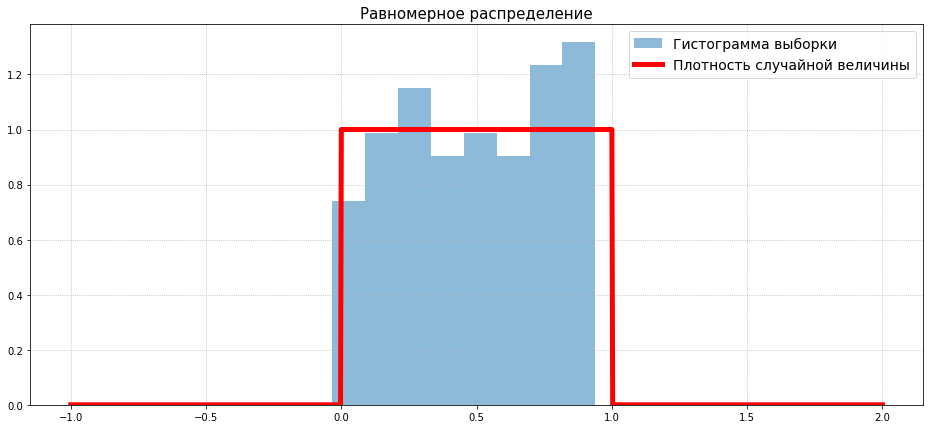

In [7]:
s = 100
uniform_data = spystats.uniform.rvs(size = s)
print("M(X) = ", uniform_data.mean())
print("Standart deviation = ", uniform_data.std())
print("Median = ", np.median(uniform_data))

grid = np.linspace(-1, 2, 1000)
plt.figure(figsize=(16, 7))
plt.hist(uniform_data, bins="auto", density=True, align='left',
        alpha=0.5, label="Гистограмма выборки")
plt.plot(grid, spystats.uniform.pdf(grid), color="red",
        lw=5, label="Плотность случайной величины")
plt.title("Равномерное распределение", fontsize=15)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=":")
plt.show()

7) Нормальное распределение

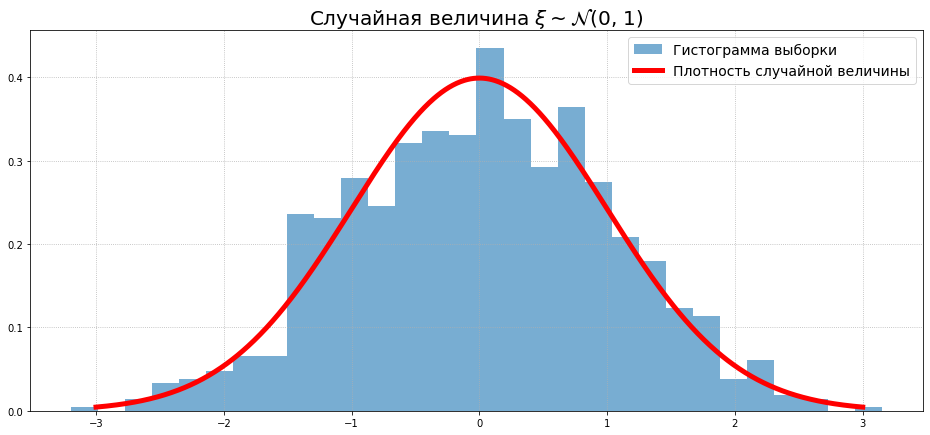

In [8]:

sample = spystats.norm.rvs(size=1000)  # выборка размера 1000
grid = np.linspace(-3, 3, 1000)  # сетка для построения графика

plt.figure(figsize=(16, 7))
plt.hist(sample, bins=30, density=True, 
         alpha=0.6, label='Гистограмма выборки') 
plt.plot(grid, spystats.norm.pdf(grid), color='red', 
         lw=5, label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim \mathcal{N}$(0, 1)', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

8) Распределение хи-квадрат

9) Распределение Стьюдента

10) Распределение Фишера

11) Распределение Вейбулла

In [9]:
sb.set(rc={'figure.figsize':(5,5)})
data = spystats.bernoulli.rvs(p = 0.8, size=1000)

In [10]:
p = 0.8
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
print("M(X) =", mean)
print("D(X) =", var)
print("skew(X) =", skew)
print("kurt(X) =", kurt)

NameError: name 'bernoulli' is not defined

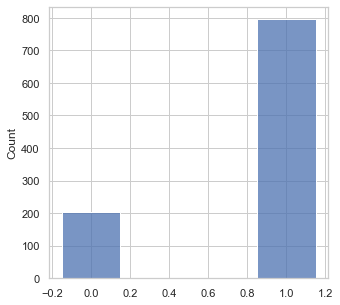

In [ ]:
sb.set_style('whitegrid')
sb.histplot(data, discrete=True, shrink=.3 , color='b')
plt.show()